In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv(r"cardio_train.csv",sep=';')
print(data.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [3]:
print("Missing values:\n", data.isnull().sum())


Missing values:
 id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [4]:
print(data.describe())

                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250    

In [5]:
scaler = StandardScaler()
scaled_features = ['height', 'weight', 'ap_hi', 'ap_lo']
data[scaled_features] = scaler.fit_transform(data[scaled_features])


In [6]:
X = data.drop(['id', 'cardio'], axis=1)  
y = data['cardio']

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


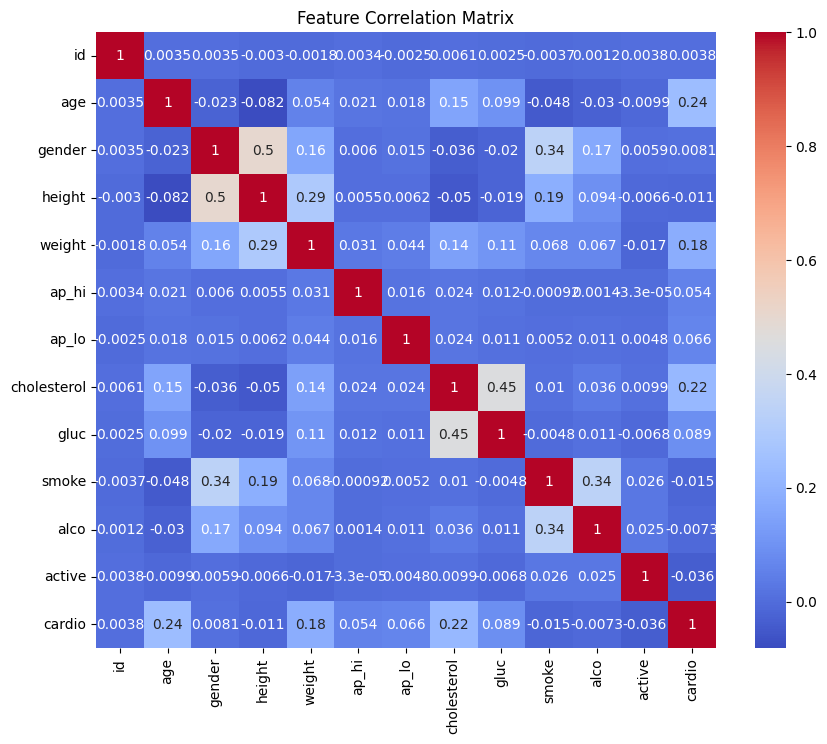

In [8]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

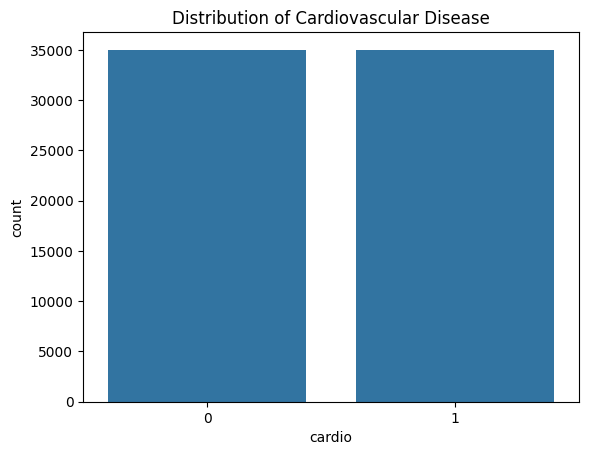

In [9]:
# Visualization: Distribution of target variable
sns.countplot(x=y)
plt.title('Distribution of Cardiovascular Disease')
plt.show()

In [10]:
from sklearn.metrics import accuracy_score

# Support Vector Machine
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print('SVM Accuracy:', accuracy_score(y_test, svm_preds))


SVM Accuracy: 0.5989285714285715


In [11]:
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
print('KNN Accuracy:', accuracy_score(y_test, knn_preds))


KNN Accuracy: 0.581


In [12]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, dt_preds))


Decision Tree Accuracy: 0.6293571428571428


In [13]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, lr_preds))


Logistic Regression Accuracy: 0.6916428571428571


c:\Users\sarib\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, rf_preds))


Random Forest Accuracy: 0.7162142857142857


In [15]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, rf_preds))
print("ROC-AUC:", roc_auc_score(y_test, rf_preds))


              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

ROC-AUC: 0.7162358599584455


In [16]:
import joblib
joblib.dump(rf_model, 'heart_disease_model.pkl')


['heart_disease_model.pkl']